In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_iris
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import *

In [2]:
dataset = load_iris()

X = dataset.data.astype('float64')
y = dataset.target

X.shape, y.shape

((150, 4), (150,))

In [3]:
X = normalize(X)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

X_train.shape

(120, 4)

In [4]:
def get_model():
    
    model = Sequential()
    
    model.add(Dense(16, input_dim=4, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [5]:
model = get_model()

history = model.fit(X_train, 
                    y_train, 
                    epochs=195, 
                    batch_size=10, 
                    validation_data=(X_test, y_test))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 120 samples, validate on 30 samples
Epoch 1/195
120/120 [==============================] - 1s 10ms/sample - loss: 1.1038 - acc: 0.3167 - val_loss: 1.0954 - val_acc: 0.3333
Epoch 2/195
120/120 [==============================] - 0s 358us/sample - loss: 1.0855 - acc: 0.3000 - val_loss: 1.0828 - val_acc: 0.3333
Epoch 3/195
120/120 [==============================] - 0s 350us/sample - loss: 1.0614 - acc: 0.4583 - val_loss: 1.0673 - val_acc: 0.6000
Epoch 4/195
120/120 [==============================] - 0s 350us/sample - loss: 1.0786 - acc: 0.3167 - val_loss: 1.0512 - val_acc: 0.6000
Epoch 5/195
120/120 [==============================] - 0s 350us/sample - loss: 1.0356 - acc: 0.5083 - val_loss: 1.0314 - val_acc: 0.6000
Epoch 6/195
120/120 [==============================] - 0s 358us/sample - loss: 1.021

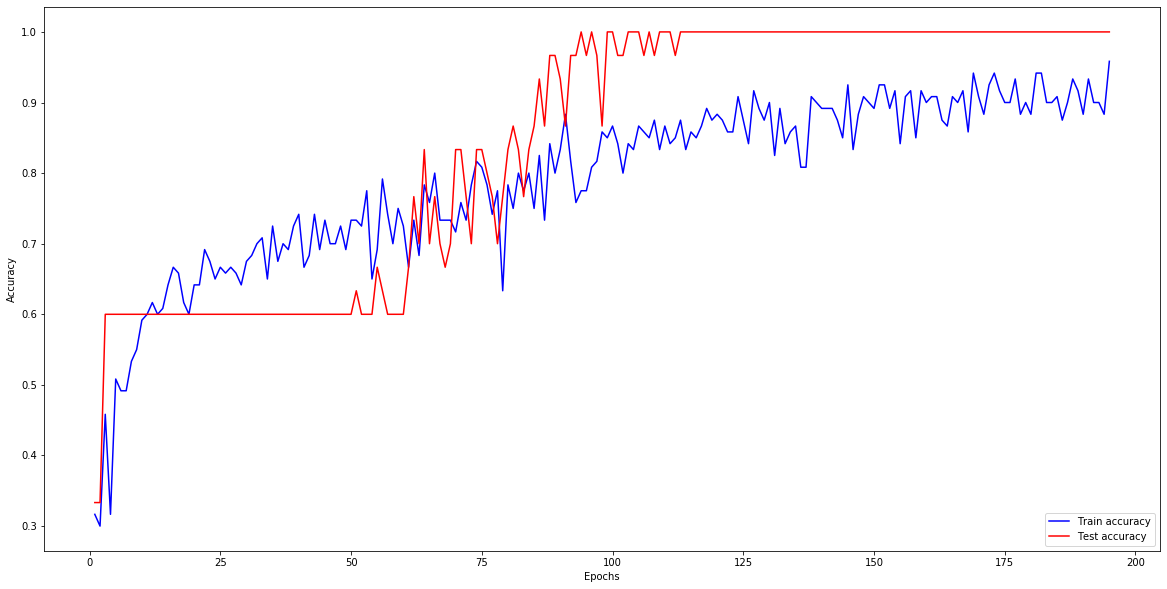

In [6]:
def plot_accuracy(history):
    x_range = range(1, len(history.history['acc']) + 1)

    plt.figure(figsize=(20, 10))

    plt.plot(x_range, history.history['acc'], 'b', label='Train accuracy')
    plt.plot(x_range, history.history['val_acc'], 'r', label='Test accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    
plot_accuracy(history)    

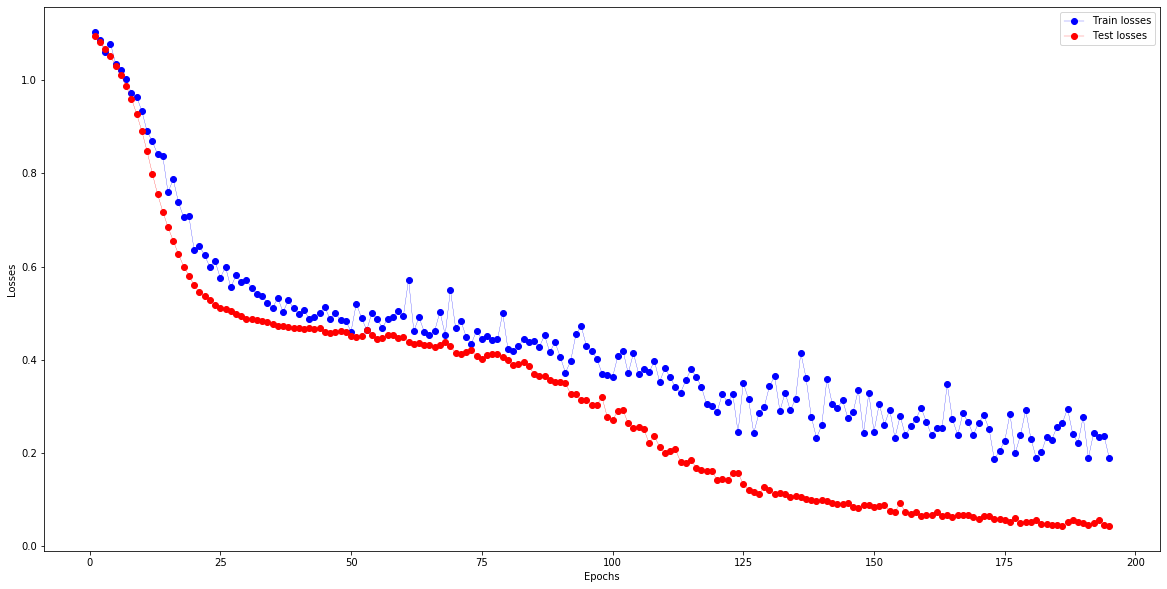

In [7]:
def plot_losses(history):
    x_range = range(1, len(history.history['loss']) + 1)

    plt.figure(figsize=(20, 10))

    plt.plot(x_range, history.history['loss'], 'b-o', label='Train losses', linewidth=0.25)
    plt.plot(x_range, history.history['val_loss'], 'r-o', label='Test losses',linewidth=0.25)
    plt.xlabel('Epochs')
    plt.ylabel('Losses')
    plt.legend(loc='upper right')
    
plot_losses(history)  